In [43]:
from core.system import SystemMilcaModel

In [44]:
model = SystemMilcaModel()

In [45]:
model.add_material(
    name="concreto",
    modulus_elasticity=2.1e6,
    poisson_ratio=0.2
)

In [46]:
model.add_rectangular_section(
    name="seccion1",
    material_name="concreto",
    base=0.3,
    height=0.5
)
model.add_rectangular_section(
    name="seccion2",
    material_name="concreto",
    base=0.5,
    height=0.5
)
model.add_rectangular_section(
    name="seccion3",
    material_name="concreto",
    base=0.6,
    height=0.6
)

In [47]:
nodes = {
    1: (0, 0),
    2: (0, 5),
    3: (0, 8.5),
    4: (0, 12),
    5: (7, 0),
    6: (7, 5),
    7: (7, 8.5),
    8: (7, 12),
}

for key, value in nodes.items():
    model.add_node(key, value)

In [48]:
elements = {
    1: (1, 2, "seccion3"),
    2: (2, 3, "seccion3"),
    3: (3, 4, "seccion3"),
    4: (5, 6, "seccion2"),
    5: (6, 7, "seccion2"),
    6: (7, 8, "seccion2"),
    7: (2, 6, "seccion1"),
    8: (3, 7, "seccion1"),
    9: (4, 8, "seccion1"),
}

for key, value in elements.items():
    model.add_element(key, *value)

In [49]:
model.add_restraint(1, (True, True, True))
model.add_restraint(5, (True, True, True))

In [50]:
model.add_load_pattern(name="Live Load")

In [51]:
model.add_point_load(2, "Live Load", "GLOBAL", 5, 0, 0)
model.add_point_load(3, "Live Load", "GLOBAL", 10, 0, 0)
model.add_point_load(4, "Live Load", "GLOBAL", 20, 0, 0)

In [52]:
model.add_distributed_load(7, "Live Load", "LOCAL", -5, -5)
model.add_distributed_load(8, "Live Load", "LOCAL", -2, -6)
model.add_distributed_load(9, "Live Load", "LOCAL", -4, -3)

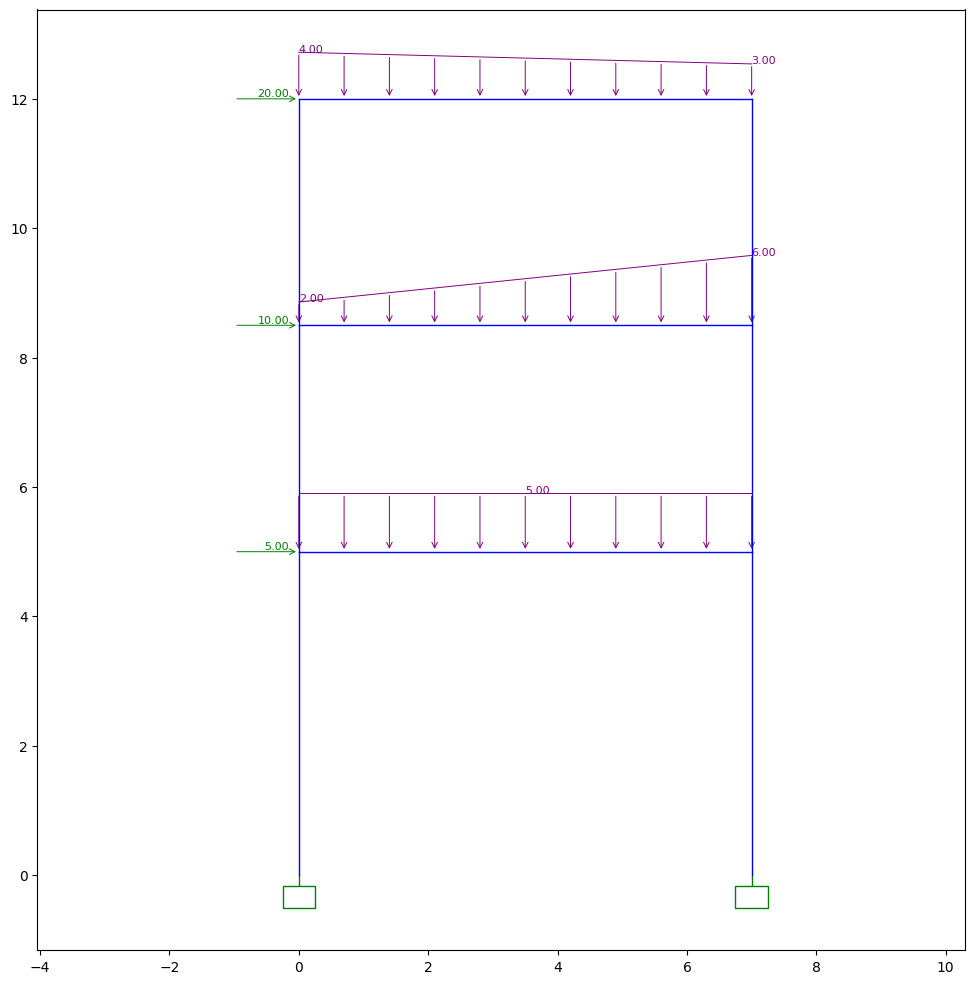

In [53]:
model.solve()
model.show_structure(show=True)

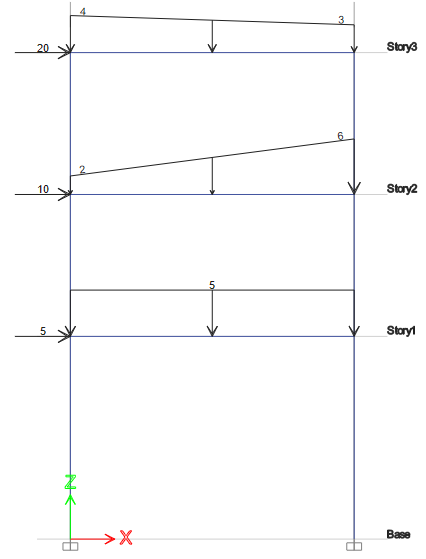


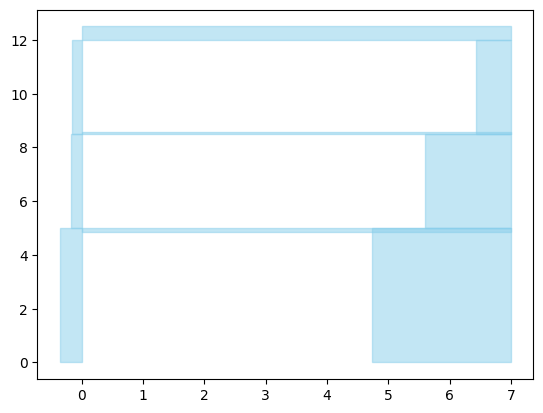

In [54]:
model.plotter.show_diagrams(type="axial_force", show=True, escala=0.03)

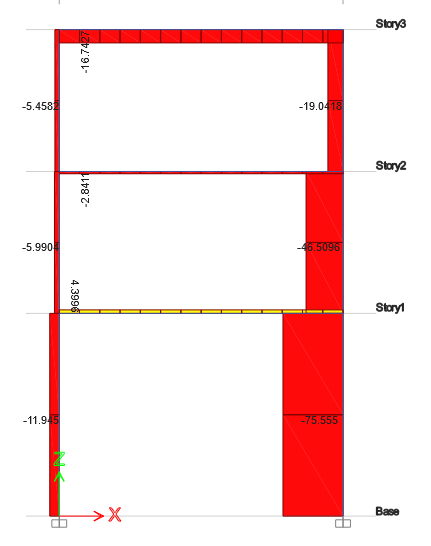


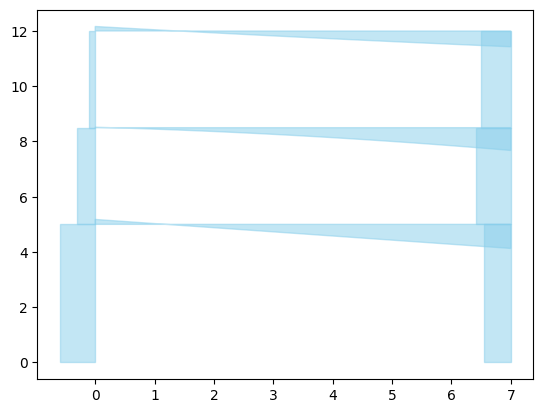

In [55]:
model.plotter.show_diagrams(type="shear_force", show=True, escala=0.03)

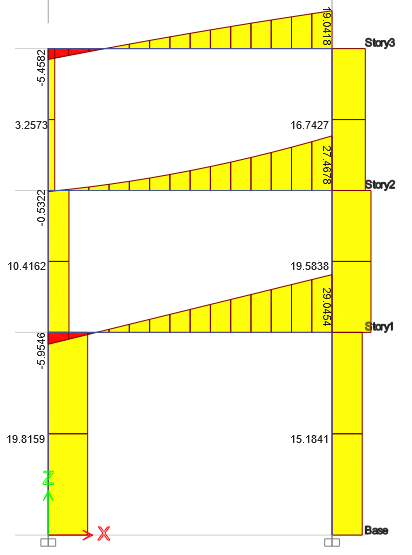


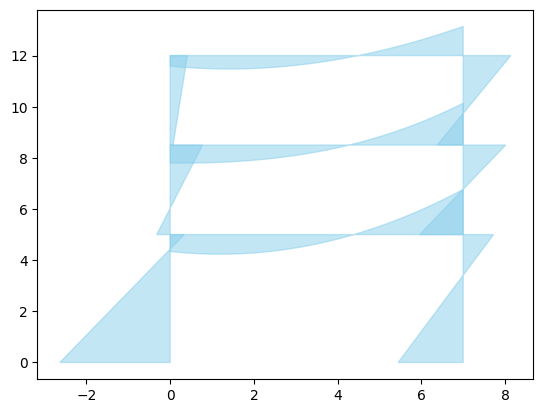

In [56]:
model.plotter.show_diagrams(type="bending_moment", show=True, escala=0.03)

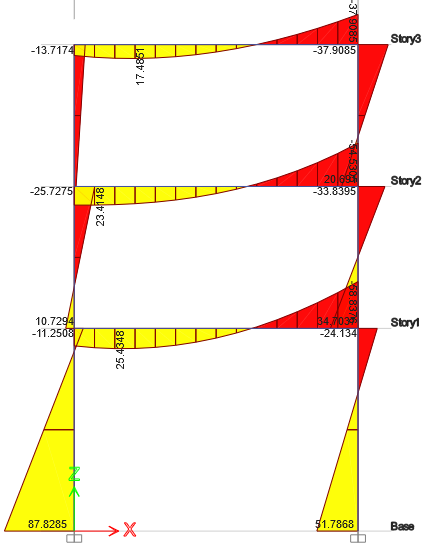


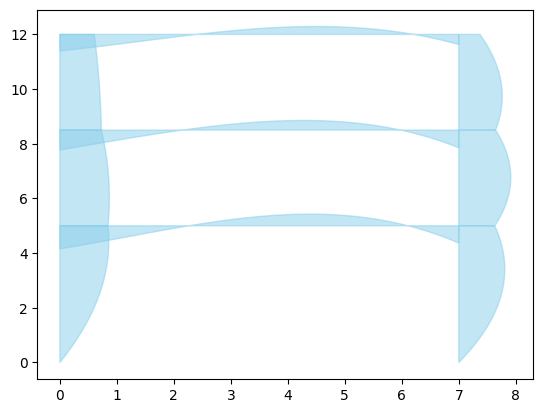

In [57]:
model.plotter.show_diagrams(type="slope", show=True, escala=100)

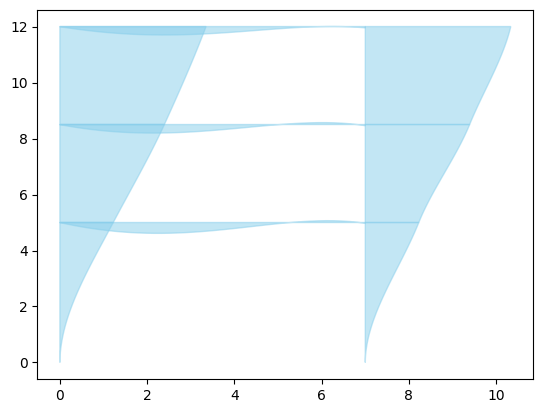

In [58]:
model.plotter.show_diagrams(type="deflection", show=True, escala=40)

In [70]:
print(model.reactions)

[-19.81585502  11.9450335   87.82847531   0.           0.
   0.           0.           0.           0.           0.
   0.           0.         -15.18414498  75.5549665   51.7867592
   0.           0.           0.           0.           0.
   0.           0.           0.           0.        ]


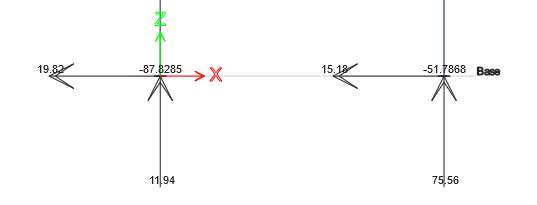


In [69]:
from frontend.widgets.UIdisplay import create_plot_window
model.plotter.axes[0].cla()
model.show_structure(show=False)
model.plotter.show_deformed(escala=10)
root = create_plot_window(model.plotter.fig)
root.mainloop()

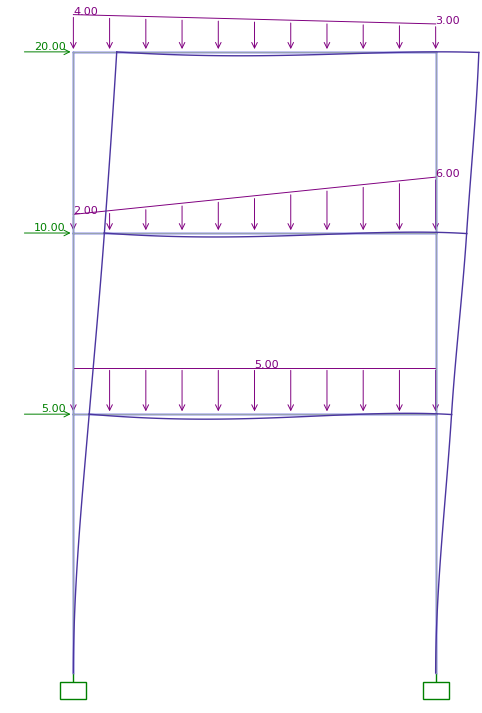


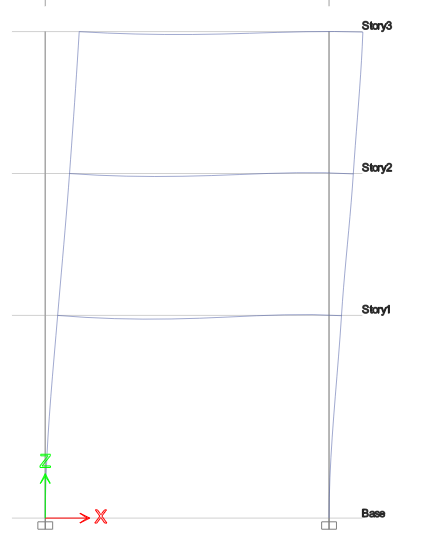
